In [22]:
%matplotlib inline

# A programming activity with reddit!

## Introduction

In today's activity, we will:

1. Create a reddit account (if you don't have one already)
2. Create an app for that reddit account
3. Scrape some reddit data
4. Do some simple text analysis of that data
5. Create a machine learning classifier for that data

We're going to be doing all of that in a [Jupyter notebook](http://jupyter.org/), which we launched "in the cloud" (really, via the use of the [My Binder](https://mybinder.org/) tool, designed by folks at U.C. Berkeley.

What is a Jupyter Notebook? Simply put, its a way to organize code and analyses in one place.  So you can, for example:
- write up some text with <b>HTML Tags</b>, or
- include links to [your favorite blogs](http://www.buffalorumblings.com/), or 
- put in some fancy math that doesn't really mean anything to you (me), or
$$
\begin{aligned}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{aligned}
$$
- even put images in of your pet!
<img width="200px" src="https://kennyjoseph.github.io/papers/strong.jpg"></img>

What we'll do in this notebook is walk through each step of our analyses, where you can run and edit the code as you wish. Note that you can also run and edit this very text if you'd like!  To do so, just double click the text. It will open up an editable text box. When you're done, you can press ```SHIFT+ENTER```, and your changes will be committed!

## Trying to edit some text

Give editing a text box a go! Change this text to whatever you want it to say!!

## Step 1: Creating a reddit account

If you don't have one already, the first thing you'll need to do is go to [reddit](http://www.reddit.com/) and create a reddit account.

## Step 2: Creating a reddit app

Now, we're going to create a reddit app. Make sure you're signed in to your reddit account, and then go to the [app page](https://ssl.reddit.com/prefs/apps/).  From here, click on the "create an app" button. <b>Make sure that you've selected the "script" option in the checkbox</b>, and then fill in a name and description. For the two URL fields, it doesn't really matter what you put. Your input should look something like mine.

<img width="1000px" src="reddit_tut_0.png" style="max-width:95%;border:3px solid black;"></img>
    
Cool! Now hit "create app" button.

## Step 3: Scraping some reddit data

### 3a - setting up your API credentials
We're now going to pull down some real, live reddit posts and take a look at them! To do so, we're going to need some information from our app.  Reddit uses this information to keep track of who is accessing their data, and in what ways they're accessing it.  In other words, reddit wants to make sure it knows who might be doing bad things with their data or to their platform, so they can shut those apps down. We'll return to that point in a bit.  But, for now, you'll need to edit the code below to enter in your ```client_id```, your ```client_secret```, and your ```username```  in order for you to be able to collect data.  ***Note - because you're going to enter your client secret here, please make sure to delete this app after class (you can always just create a new one)! While its unlikely that anyone would be able to access it from this script, better to be safe than sorry***. You can find the first two on the app creation page, where the red boxes are in the image below:

<img width="1000px" src="reddit_tut_1.png" style="max-width:95%;border:3px solid black;"></img>

Enter your information between the appropriate quotation marks in the (python) code below, replacing the phrase ```ENTER_YOUR_XXX_HERE```.

 ***Make sure to push ```SHIFT+ENTER``` after you've changed the code!*** 

In [1]:
your_client_id = 'Ba3BdMzXl3FIZQ'
your_client_secret = 'kRW_Wc1nGf-FuwceLv1bvTXtU54'
your_username = "ENTER_YOUR_USERNAME_HERE"

### 3b - Selecting a subreddit

Ok, we're almost all set up to scrape! to do so, we're going to use a python library called [praw](https://praw.readthedocs.io/).  Praw is a relatively powerful tool, allowing you to do a bunch of cool things with the reddit API.  Today, we're just going to do the basics.  We're first going to pull down a bunch of submissions from a given subreddit of interest to you.  Enter the name of the subreddit you're interested in in the quotations below, just like you entered your ```client_id```. If you like jokes, feel free to follow along with me on the [Jokes subreddit](http://www.reddit.com/r/Jokes)!

*Be careful, though. The Jokes subreddit works for this analysis largely because its text based, and we're going to do text analysis. If you try a different one, make sure it isn't totally image based, or you're going to have no fun.*



***Regardless, i.e. even if you want to do the Jokes reddit, make sure to push ```SHIFT+ENTER``` on the code block below!***

In [2]:
subreddit_of_interest = "Jokes"

### 3c - Authenticating our application

The last step before we start crawling is to set ourselves up to make authenticated calls to the reddit API. In class, we spent a few minutes talking about how this process works for one specific authentication mechanism, OAuth2.  Here, because we're just using a script for personal use, reddit actually makes it even easier; we just pass some information along in our HTTP request. The ```praw``` library makes this relatively easy, so we'll just use it. For more details on this authentication process, though, you can go [here](https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example).

In [4]:
# This is a comment in the code. All comments in python are preceeded by a pound sign
# Comments can be plain English, because the computer ignores them when running the code.
# The line of code below this comment imports code written by other people in the form of the 
# praw library
import praw

import warnings
warnings.filterwarnings('ignore')


# This line of code calls a function in the praw library.
# That function (or block of code, which is hidden in the praw library's code)
# sets us up to easily make calls to the reddit API moving forward, without
# having to enter this information every time we make a call
reddit = praw.Reddit(client_id=your_client_id,
                     client_secret=your_client_secret,
                     user_agent=your_username + ": my first scraper")

### 3c - Finally, some scraping!

Alright, now we can finally pull some data down from the reddit API!

We're going to pull down the top 1024 posts of all time from our subreddit of choice in the code below

In [6]:
# A library for fancy progress bars
from tqdm import tqdm

subreddit = reddit.subreddit(subreddit_of_interest)

print("You're pulling down posts from: ",subreddit.display_name)

# create a list of submissions and load using a progress bar
submissions = []

# populate that list 
for submission in tqdm(subreddit.top(limit=1024), desc="Progress on pulling posts down", total=1024):
    submissions.append(submission)

print("You're done now, even if the progress bar doesn't say so ... just means that we didn't get a full 1024!")


Progress on pulling posts down:   0%|          | 0/1024 [00:00<?, ?it/s]

You're pulling down posts from:  Jokes


Progress on pulling posts down:  97%|█████████▋| 998/1024 [00:07<00:00, 131.77it/s]

You're done now, even if the progress bar doesn't say so ... just means that we didn't get a full 1024!


## Step 4: Analyzing the data


### 4a : Checking out some individual posts
Cool! We've now got a bunch of submissions to look at! Let's check out some details about the first one!

In [11]:
# a library for nice formatting of times
import arrow

submission_index_we_want_to_look_at = 0

if submission_index_we_want_to_look_at > (len(submissions)-1):
    print("The index you chose is bigger than the number of submissions we have, so",
           "I'm just showing you the first one!")
    submission_index_we_want_to_look_at = 0
    
sub = submissions[submission_index_we_want_to_look_at]

description_str = """
Setup (if jokes, otherwise post title): {}
\nPunchline (if jokes, otherwise description): {}
\nWhen posted: {}
\nNumber of upvotes: {}
\nNumber of downvotes: {}
\nTotal Score: {}
\nLink to Submission: {}
"""
print(description_str.format(
    sub.title,
    sub.selftext,
    arrow.get(sub.created_utc).humanize(), 
    sub.ups, 
    sub.downs,
    sub.score,
    sub.shortlink))


Setup (if jokes, otherwise post title): Calm down about the Net Neutrality thing...

Punchline (if jokes, otherwise description): Paying additional money to access certain sites will give you a sense of pride and accomplishment.

When posted: 9 months ago

Number of upvotes: 136355

Number of downvotes: 0

Total Score: 136355

Link to Submission: https://redd.it/7ekt23



Now, check out a few more posts by changing the index into the submissions list!

### 4b : Looking at the distribution of scores

Even though we're looking at the top posts of all time, we probably expect to see some variation in the overall scores.

To see that better, we're going to plot (using the [seaborn](https://seaborn.pydata.org/) library) the distribution of scores for these top posts.  We're going to do that using a type of plot called a [histogram](https://en.wikipedia.org/wiki/Histogram). 

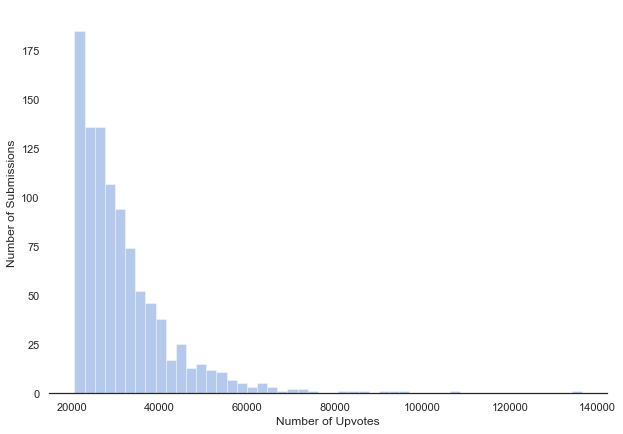

<Figure size 432x288 with 0 Axes>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# get the scores for all the submissions we have
d = [s.score for s in submissions]
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1,1, figsize=(10, 7), sharex=True)
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
ax = sns.distplot(d, kde=False, color="b")
ax.set(xlabel="Number of Upvotes", ylabel="Number of Submissions")
plt.show()
plt.savefig("upvote_distribution.png")

### 4c: Looking at some common words

So we've now seen that the distribution of scores is "heavy-tailed", even among the top posts of all-time (imagine what it looks like over all posts, ever)!  

But what makes a good reddit post? We're going to try to understand that by looking at the most common words and phrases in *all* of the top posts, first.

To do that, we're going to need to analyze the text of the jokes. There are many, many libraries available for text analysis, and as we talked about a bit in class, many, many different ways to analyze and process text.  Today, we're just going to do the simplest possible thing!  We're going to:

1. Take all the text from each post
2. Tokenize the text into *unigrams* - or single word tokens
3. Count the number of times each unigram appears in any joke
4. Visualize those counts!

To do our text analysis, we're going to make use of the [nltk](https://www.nltk.org/) library, one of the more popular python libraries for basic text processing.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kennyjoseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kennyjoseph/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


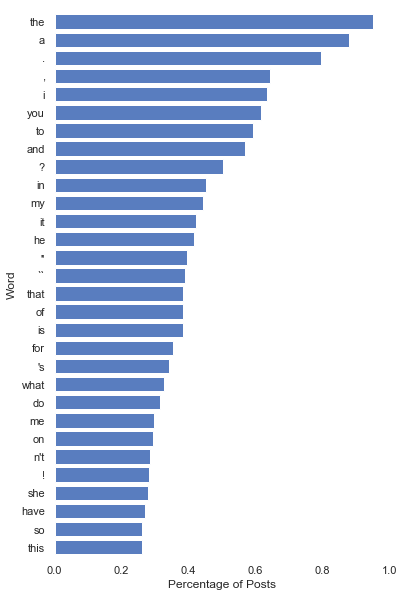

In [13]:
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Step 1: put all the text from each post into a single object (a single "string")
submission_strings = [s.title + s.selftext for s in submissions]

# Step 2: tokenize, counting each token only once
tokenized_submissions = [set(word_tokenize(s)) for s in submission_strings]

# Step 3: 
# aggregate tokens from all posts into a single list
all_tokens = [token.lower() for tokenized in tokenized_submissions for token in tokenized ]
# and count them up
all_tokens_counted = Counter(all_tokens)

# Step 4: Visualize - check out the top 30 terms, by percentage of posts they were in
data_to_vis = pd.DataFrame(all_tokens_counted.most_common(30), columns=['Token','Count'])
# determine percent!
data_to_vis['percentage'] = data_to_vis.Count / len(submissions)
# Plot
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(data=data_to_vis, y='Token',x='percentage',color='b')
ax.set(xlim=(0, 1), ylabel="Word",
       xlabel="Percentage of Posts")
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig("initial_word_distro.pdf")

Well that's pretty uninteresting, isn't it! What happened? Basically, we found that all of the popular posts have super common words in them, and some punctuation.  So, this time, lets do the same thing, but get rid of common words, or **stopwords**, as well as punctuation

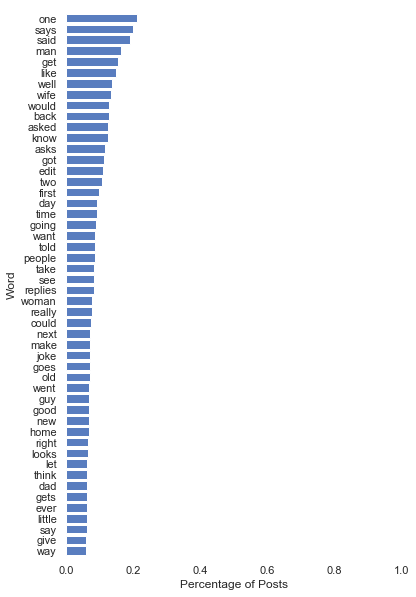

<Figure size 432x288 with 0 Axes>

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Step 3, again: 
# aggregate tokens from all posts into a single list
all_tokens = [token.lower() for tokenized in tokenized_submissions for token in tokenized ]
# now - get rid of boring tokens (non-words, short words, and non-stopwords)
all_tokens = [token for token in all_tokens if token.isalnum() and token not in stop_words and len(token) >= 3 ]
# and count them up
all_tokens_counted = Counter(all_tokens)

# Step 4: Lets look at the top 50 this time
data_to_vis = pd.DataFrame(all_tokens_counted.most_common(50), columns=['Token','Count'])
# determine percent!
data_to_vis['percentage'] = data_to_vis.Count / len(submissions)
# Plot
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(data=data_to_vis, y='Token',x='percentage',color='b')
ax.set(xlim=(0, 1), ylabel="Word",
       xlabel="Percentage of Posts")
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig("cleaned_word_distro.pdf")

## Step 5: Finding words predictive of high scores

OK, we're starting to get somewhere! We can see, for example, that a lot of jokes center around people, and maybe more specifically about gendered individuals ("wife", "man", "woman", "dad", "guy"...).  But this is still kind of uninteresting.  What would be *most* ideal would be to see **which words predict high scores**.  Enter in a machine learning model!

We're going to build a simple machine learning model. Recall that in machine learning, at a basic level, we need:

1. something to predict, 
2. some "features" that we can use to make those predictions and 
3. a model that we can use to map features to the values we're trying to predict.  

Here, we're going to:
1. **predict the score of a post** from
2. **the words within the post** using
3. a [regularized linear regression](https://www.coursera.org/lecture/machine-learning/regularized-linear-regression-QrMXd) model

We're then going to look at the output of the model. Specifically, we're going to look at what words the model identifies as being **most likely to be predictive of a higher score**.

Note that we're not going to talk in any detail about the model, that will be for later courses. But, if you're interested in what its doing, feel free to watch the Coursera video, or come talk to Prof. Joseph during office hours!

The code for this analysis is below; if you'd like to learn more about how this code (as opposed to the model) works, it is largely drawn from [this tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import Lasso

count_vect = CountVectorizer(stop_words='english', min_df =.01)
X_counts = count_vect.fit_transform([s.title + s.selftext for s in submissions])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

y = [s.score for s in submissions ]

model = Lasso(alpha=.001,normalize=True)
fitted = model.fit(X_tfidf, y)

coefficient_data = pd.DataFrame(list(zip(count_vect.vocabulary_.keys(),model.coef_)), 
                                columns=['word','coef'])

top_positive = coefficient_data.sort_values("coef",ascending=False)[:25].word
top_negative = coefficient_data.sort_values("coef",ascending=True)[:25].word

print("""Top 25 words predicting a higher score:\n\n{}

Top 25 words predicting a lower score: \n\n{}
""".format(", ".join(top_positive), ", ".join(top_negative)))

Top 25 words predicting a higher score:

returns, church, laughed, making, explain, hold, orders, hot, want, new, worst, lost, honey, bed, looking, tried, dad, tells, town, crying, kid, choose, dead, yeah, obviously

Top 25 words predicting a higher score: 

ground, difference, does, immediately, naked, fucking, play, driver, going, game, wall, buy, doctor, post, girl, minute, room, check, story, watching, blonde, baby, confused, upvotes, lot



## Step 6 (bonus step!): Discussion and another (fancier) analysis of reddit data

Today, we did a whirlwind tour of scraping some data, inspecting that data, and then building a machine learning classifier to further quantify potential insights into popularity.

Note that there are so many other things we could have chosen to do with this data! For example, check out [this](https://explosion.ai/demos/sense2vec) demo of how we might have used (a lot more) reddit data to find words and phrases that are similar to each other!

More importantly, because we did everything fairly quickly, and took some shortcuts, our analysis is **flawed in many important ways**.  For example, our analysis only includes posts that were *already highly popular*, meaning that we could be totally missing things that differentiate posts that are not popular at all from ones that are even kind of popular.  Also - we didn't even check that our model fit well!

We also didn't show at all how to use the API to **post content**, which we could also do! See the [praw](https://praw.readthedocs.io/en/latest/tutorials/reply_bot.html) documentation for code and a tutorial on how to do that!

All that, for a different day.

In the meantime, with the remaining time in class, discuss some other potential ways in which our analysis is flawed, and how those flaws could be corrected.  Then, discuss some potential expansions on our analysis. What else could be done with this data? What could we learn?  Hopefully, you have some great ideas now!